# 3D SARS-CoV-19 Protein Visualisation With Biopython

In [2]:
!pip3 install biopython 
!pip install nglview
!pip install dna_features_viewer
print('All packages were installed sucessfully.')

All packages were installed sucessfully.


In [1]:
import Bio
import heapq
import pylab
import urllib
import pandas as pd
import nglview as nv
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser,MMCIFParser
from Bio.SeqUtils import GC,molecular_weight
from dna_features_viewer import GraphicFeature, GraphicRecord
print("Imported libraries.")

Imported libraries.


In [2]:
# Check Attributes of Biopython
dir(Bio)

['Align',
 'BiopythonDeprecationWarning',
 'BiopythonExperimentalWarning',
 'BiopythonParserWarning',
 'BiopythonWarning',
 'Blast',
 'Data',
 'File',
 'GenBank',
 'MissingExternalDependencyError',
 'MissingPythonDependencyError',
 'PDB',
 'SVDSuperimposer',
 'SearchIO',
 'Seq',
 'SeqFeature',
 'SeqIO',
 'SeqRecord',
 'SeqUtils',
 'Sequencing',
 'StreamModeError',
 'SwissProt',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_parent_dir',
 'os',
 'warnings']

In [3]:
# Loading FASTA file
seq_file_read = SeqIO.read("Sequence_data/sequence.fasta", "fasta")
type(seq_file_read)

Bio.SeqRecord.SeqRecord

In [4]:
# list sequence details
seq_file_read.id

'MN908947.3'

In [5]:
# list sequence details
for record in SeqIO.parse("Sequence_data/sequence.fasta","fasta"):
    print(record)

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [6]:
print(record.id)

MN908947.3


In [7]:
# store sequence for later analysis
seqfromfile = record.seq
seqfromfile

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [8]:
# length of sequence
len(seqfromfile)

29903

In [9]:
#molecular weight
molecular_weight(seqfromfile)

9241219.214400413

In [10]:
# CODON
seqfromfile[0:3]

Seq('ATT')

In [11]:
seqfromfile[0:3]+seqfromfile[-3:]

Seq('ATTAAA')

In [12]:
seqfromfile.find('AGA')

54

In [13]:
# LOGIC
(seqfromfile.count('G') + seqfromfile.count('C'))/(len(seqfromfile)) * 100

37.97277865097147

In [14]:
#GC content using Biopython
GC(seqfromfile)

37.97277865097148

In [15]:
seqfromfile[0:6]

Seq('ATTAAA')

In [16]:
#complement

seqfromfile[0:6].complement()

Seq('TAATTT')

In [17]:
#reverse complement

seqfromfile[0:6].reverse_complement()

Seq('TTTAAT')

In [18]:
#Transcribe

mRNA = seqfromfile.transcribe()
mRNA[:10]

Seq('AUUAAAGGUU')

In [19]:
#Back transcribe

mRNA.back_transcribe()[:10]

Seq('ATTAAAGGTT')

In [20]:
# Translation
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [21]:
protein_seq = seqfromfile.translate()
protein_seq[:10]

/Users/gil/opt/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*Q')

In [22]:
len(protein_seq)

9967

In [23]:
len(seqfromfile)

29903

In [24]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [25]:
# Listing the most common amino acids

common_amino = Counter(protein_seq)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

In [26]:
del common_amino['*']

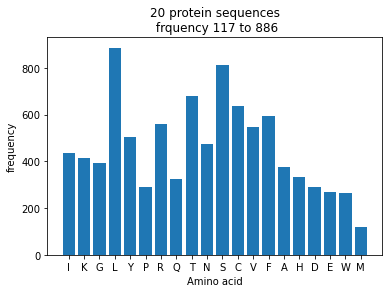

In [27]:
# visualize all 20 amino acid occurrences in the form of a histogram

pylab.bar(common_amino.keys(),common_amino.values())

pylab.title("%i protein sequences\n frquency %i to %i" 
            % (len(common_amino.values()), 
               min(common_amino.values()), 
               max(common_amino.values())))

pylab.xlabel("Amino acid")
pylab.ylabel("frequency")
pylab.show()

In [28]:
protein_list = [str(i) for i in protein_seq.split('*')]
protein_list[:10]

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG']

In [29]:
# convert sequences to dataframe
large_proteins = [x for x in protein_list if len(x)> 10]
df = pd.DataFrame({'protein_seq':large_proteins})

In [30]:
# Add a column with sequence lengths

df['length'] = df['protein_seq'].apply(len)
df.head()

,protein_seq,length
0,QTNQLSISCRSVL,13
1,TNFKICVAVTRLHA,14
2,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER,35
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
4,TALCVHQTFGCSNCTSWSCYG,21


In [31]:
# sort sequence data
df.sort_values(by = ['length'], ascending = False)[:10]

,protein_seq,length
118,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
157,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
168,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
158,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
167,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
93,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
188,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43
116,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
182,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43


In [32]:
# let's take a single protein from the table

one_large_protein = df.nlargest(1,'length')
single_prot = one_large_protein.iloc[0,0]
single_prot

'CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSY

In [33]:
# write to a file

with open("Sequence_data/single_seq.fasta","w") as file:
    file.write(">largest_seq \n"+single_prot)
    

In [34]:
# Basic Local Alignment Using NCBI-BLAST
# Read single_seq.fasta

read = SeqIO.read("Sequence_data/single_seq.fasta", "fasta")
read.seq

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [35]:
%%time

#Query

result_handle = NCBIWWW.qblast("blastp","pdb",read.seq)

blast_qresult = SearchIO.read(result_handle, "blast-xml")

CPU times: user 77.2 ms, sys: 18.2 ms, total: 95.5 ms
Wall time: 1min 4s


In [36]:
print(blast_qresult[0:5])

Program: blastp (2.11.0+)
  Query: unnamed (2701)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|7D4F|A  Structure of COVID-19 RNA-dependent RNA pol...
            1      1  pdb|6YYT|A  Structure of replicating SARS-CoV-2 polymer...
            2      1  pdb|6XEZ|A  Structure of SARS-CoV-2 replication-transcr...
            3      1  pdb|7BW4|A  Structure of the RNA-dependent RNA polymera...
            4      1  pdb|6XQB|A  SARS-CoV-2 RdRp/RNA complex [Severe acute r...


In [37]:
#fetch the id, description, evalue, bitscore & alignment of first hit

seqid = blast_qresult[0]

details = seqid[0]

print(f"\
Sequence ID:{seqid.id}\n\
description:{seqid.description}\n\
E value:    {details.evalue} \n\
Bit Score:  {details.bitscore}\n\
")

Sequence ID:pdb|7D4F|A
description:Structure of COVID-19 RNA-dependent RNA polymerase bound to suramin [Severe acute respiratory syndrome coronavirus 2]
E value:    0.0 
Bit Score:  1938.7



In [38]:
print(f"alignment:\n{details.aln}")

alignment:
Alignment with 2 rows and 926 columns
FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...LQA unnamed
LNRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...LQG pdb|7D4F|A


In [39]:
# Read PDB File
seqid.id

'pdb|7D4F|A'

In [40]:
# split seqid

seqid.id.split('|')[1]

'7D4F'

In [41]:
# link format https://files.rcsb.org/download/6YYT.pdb

urllib.request.urlretrieve('https://files.rcsb.org/download/7D4F.pdb',
                           'Sequence_data/7D4F.pdb')

('Sequence_data/7D4F.pdb', <http.client.HTTPMessage at 0x7f95fdff2700>)

In [42]:
parser = PDBParser()

structure = parser.get_structure("6YYT","Sequence_data/7D4F.pdb")
structure

<Structure id=6YYT>

In [43]:
for chain in structure[0]:
    print(f"chainid: {chain.id}")

chainid: B
chainid: C
chainid: G
chainid: A


In [44]:
nv.demo()

NGLWidget()

In [45]:
view = nv.show_biopython(structure)
view

NGLWidget()

In [46]:
view.render_image()

Image(value=b'', width='99%')

In [47]:
#GUI
nv.show_biopython(structure, gui=True)

NGLWidget()